In [1]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torchaudio
import librosa
import torchaudio.transforms as trans
from model import WaveNet

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import IPython.display
import numpy as np

In [3]:
audio,_ = librosa.load('./VCTK/p225/p225_001.wav',sr=16000,mono=True)
audio,_ = librosa.effects.trim(audio, top_db=10, frame_length=2048)
wav_tensor = torch.from_numpy(audio).unsqueeze(1)
wav_tensor = trans.MuLawEncoding()(wav_tensor).transpose(0,1)

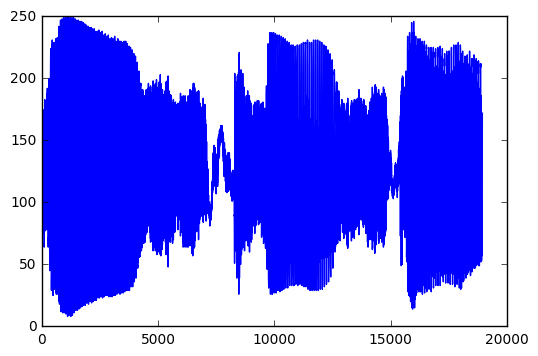

In [4]:
plt.plot(wav_tensor.numpy()[0])

In [5]:
model = WaveNet().cuda()
model.load_state_dict(torch.load('model.pth'))

In [6]:
recp_field=5116
sample_len = 16000*20

sample = Variable(wav_tensor[:,:recp_field]).cuda()
for i in range(sample_len):
    logits = model(sample[:,-5116:])
    m = torch.distributions.Categorical(F.softmax(logits,dim=1).view(-1))
    new = m.sample()
    sample = torch.cat((sample,new),dim=1)
    
    if i % 16000 == 0:
        print i

0
16000
32000
48000
64000
80000
96000
112000
128000
144000
160000
176000
192000
208000
224000
240000
256000
272000
288000
304000


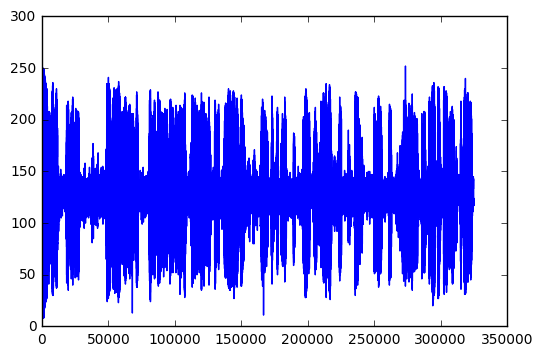

In [7]:
plt.plot(sample.cpu().data.numpy()[0])

In [9]:
sample = trans.MuLawExpanding()(sample.cpu().data)
librosa.output.write_wav("sample.wav",sample.numpy()[0],sr=16000)

RuntimeError: cannot call .data on a torch.Tensor: did you intend to use autograd.Variable?